# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [1]:
# Read data into a dataframe(s).
import pandas as pd
customerdems=pd.read_csv('customer_data.csv')
addata=pd.read_csv('ad_data.csv')

print('\nCustomer Dems:')
customerdems.info()
df=customerdems.merge(addata, how='left', on='customer_id')
print('\nAdd info:')
addata.info()

print('\nMerged info:')
df.info()

df.head()
# Don't forget to call info()!


Customer Dems:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  int64  
 1   state        10000 non-null  object 
 2   sex          10000 non-null  object 
 3   age          10000 non-null  float64
 4   occupation   10000 non-null  object 
 5   family_size  10000 non-null  int64  
 6   income       10000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB

Add info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   ad_type           10000 non-null  object
 2   ad_medium         10000 non-null  object
 3   ad_response       10000 non-null  bool  
 4   items_purchased   10000 non-null  ob

,customer_id,state,sex,age,occupation,family_size,income,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased
0,9167,MO,F,42.0,Food Service,1,40343,DISCOUNT-20%,Instagram photo ad,True,"['mexican pizza', 'chicken quesadilla']","['mountain dew', 'mug root beer']"
1,531,MI,F,36.0,Retail,4,41730,DISCOUNT-10%,Instagram photo ad,False,"['steak garlic nacho fries', 'crunchy taco', '...","['mug root beer', 'iced tea', 'starry', 'iced ..."
2,2265,CA,F,25.0,IT,0,84024,DISCOUNT-20%,15 sec YouTube ad,False,['chicken quesadilla'],['mug root beer']
3,7550,VA,M,38.0,Food Service,2,38990,BOGO - Garlic Steak Nacho Fries,15 sec YouTube ad,True,"['steak garlic nacho fries', 'steak garlic nac...","['pepsi', 'diet pepsi', 'diet pepsi']"
4,5334,MT,M,35.0,Food Service,1,33400,DISCOUNT-20%,15 sec YouTube ad,False,"['spicy potato soft taco', 'nachos bellgrande']","['gatorade', 'baja blast']"


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

In [2]:
# Train model here.

#Features:  Ad_response, Income, age, ad_medium


sdf=[]
for i, player in df.iterrows():
    drinks = player['drinks_purchased']
    if 'baja blast' in drinks:
        sdf.append(player)
sdf=pd.DataFrame(sdf)
sdf.info()
sdf.head()

sdf['ad_rep_num']=None
for i, row in sdf.iterrows():
    rep = row['ad_response']
    if rep is False:
        sdf.loc[i, 'ad_rep_num'] = 0
    else:
        sdf.loc[i, 'ad_rep_num'] = 1

sdf.info()
sdf.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4379 entries, 4 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       4379 non-null   int64  
 1   state             4379 non-null   object 
 2   sex               4379 non-null   object 
 3   age               4379 non-null   float64
 4   occupation        4379 non-null   object 
 5   family_size       4379 non-null   int64  
 6   income            4379 non-null   int64  
 7   ad_type           4379 non-null   object 
 8   ad_medium         4379 non-null   object 
 9   ad_response       4379 non-null   bool   
 10  items_purchased   4379 non-null   object 
 11  drinks_purchased  4379 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 414.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4379 entries, 4 to 9998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------       

,customer_id,state,sex,age,occupation,family_size,income,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased,ad_rep_num
4,5334,MT,M,35.0,Food Service,1,33400,DISCOUNT-20%,15 sec YouTube ad,False,"['spicy potato soft taco', 'nachos bellgrande']","['gatorade', 'baja blast']",0
5,9168,FL,F,68.0,Retired,3,0,DISCOUNT-5%,30 sec cable TV ad,False,"['cinnamon twists', 'mexican pizza', 'soft tac...","['brisk', 'iced tea', 'baja blast', 'iced tea']",0
7,5405,NC,M,45.0,Other,3,70379,DISCOUNT-20%,30 sec Hulu commercial,False,"['nachos bellgrande', 'spicy potato soft taco'...","['baja blast', 'baja blast', 'pepsi', 'pepsi']",0
9,9385,NE,M,20.0,IT,0,77982,REWARD - Free Baja Blast with purchase of $20 ...,15 sec YouTube ad,True,"['chicken quesadilla', 'beefy 5 layer burrito'...",['baja blast'],1
11,3989,AL,M,46.0,Retail,1,47946,BOGO - Baja Blast,Static Facebook ad,True,"['spicy potato soft taco', 'beefy 5 layer burr...","['baja blast', 'baja blast']",1


In [3]:
print(sdf['ad_medium'].unique())

['15 sec YouTube ad' '30 sec cable TV ad' '30 sec Hulu commercial'
 'Static Facebook ad' 'Instagram photo ad' '15 sec TikTok ad'
 'Newspaper ad']


In [4]:
sdf['ad_med_num']=None
for i, row in sdf.iterrows():
    med = row['ad_medium']
    if 'Static' in med or 'photo' in med or 'Newspaper' in med:
        sdf.loc[i, 'ad_med_num'] = 0
    else:
        sdf.loc[i, 'ad_med_num'] = 1

sdf.info()
sdf.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4379 entries, 4 to 9998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       4379 non-null   int64  
 1   state             4379 non-null   object 
 2   sex               4379 non-null   object 
 3   age               4379 non-null   float64
 4   occupation        4379 non-null   object 
 5   family_size       4379 non-null   int64  
 6   income            4379 non-null   int64  
 7   ad_type           4379 non-null   object 
 8   ad_medium         4379 non-null   object 
 9   ad_response       4379 non-null   bool   
 10  items_purchased   4379 non-null   object 
 11  drinks_purchased  4379 non-null   object 
 12  ad_rep_num        4379 non-null   object 
 13  ad_med_num        4379 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 612.3+ KB


,customer_id,state,sex,age,occupation,family_size,income,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased,ad_rep_num,ad_med_num
4,5334,MT,M,35.0,Food Service,1,33400,DISCOUNT-20%,15 sec YouTube ad,False,"['spicy potato soft taco', 'nachos bellgrande']","['gatorade', 'baja blast']",0,1
5,9168,FL,F,68.0,Retired,3,0,DISCOUNT-5%,30 sec cable TV ad,False,"['cinnamon twists', 'mexican pizza', 'soft tac...","['brisk', 'iced tea', 'baja blast', 'iced tea']",0,1
7,5405,NC,M,45.0,Other,3,70379,DISCOUNT-20%,30 sec Hulu commercial,False,"['nachos bellgrande', 'spicy potato soft taco'...","['baja blast', 'baja blast', 'pepsi', 'pepsi']",0,1
9,9385,NE,M,20.0,IT,0,77982,REWARD - Free Baja Blast with purchase of $20 ...,15 sec YouTube ad,True,"['chicken quesadilla', 'beefy 5 layer burrito'...",['baja blast'],1,1
11,3989,AL,M,46.0,Retail,1,47946,BOGO - Baja Blast,Static Facebook ad,True,"['spicy potato soft taco', 'beefy 5 layer burr...","['baja blast', 'baja blast']",1,0


[[6.23824451e-01 5.20376176e-01 3.48507837e+03 4.64858934e+01]
 [6.03260870e-01 6.25000000e-01 1.13814505e+05 4.39130435e+01]
 [4.53125000e-01 5.93750000e-01 1.85479609e+05 4.86718750e+01]
 [6.64335664e-01 6.08391608e-01 5.26230023e+04 3.99813520e+01]
 [5.96153846e-01 5.00000000e-01 2.51082885e+05 5.89615385e+01]
 [5.81699346e-01 5.62091503e-01 1.44894059e+05 4.90653595e+01]
 [6.00950119e-01 6.34204276e-01 6.92579026e+04 3.50617577e+01]
 [6.16692427e-01 6.18238022e-01 3.71283478e+04 3.48377125e+01]
 [6.00558659e-01 6.11731844e-01 8.91929749e+04 3.96592179e+01]]


C:\Users\georg\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\georg\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\georg\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\georg\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\georg\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

<Axes: >

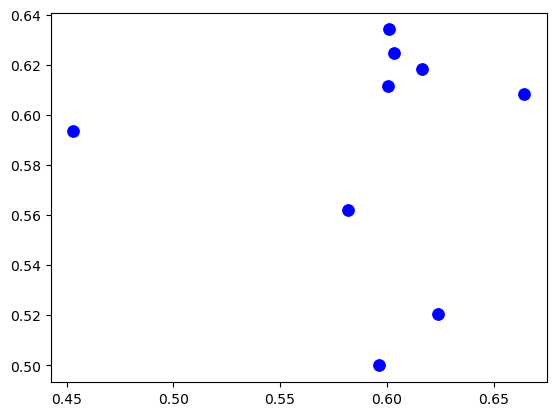

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

train_df, test_df = train_test_split(sdf, test_size=0.4, random_state=42)
train_df = train_df[["ad_med_num", "ad_rep_num", "income", "age"]]

import matplotlib.pyplot as plt
import seaborn as sns
model = KMeans(n_clusters=9)
model.fit(train_df)
cluster_centers = model.cluster_centers_
print(cluster_centers)

x = cluster_centers[:, 0]
y = cluster_centers[:, 1]
sns.scatterplot(x=x, y=y, s=100, color='blue', marker='o')


<Axes: >

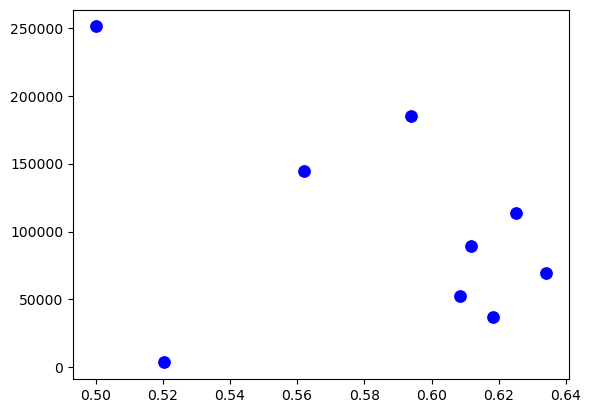

In [6]:

x = cluster_centers[:, 1]
y = cluster_centers[:, 2]
sns.scatterplot(x=x, y=y, s=100, color='blue', marker='o')

<Axes: >

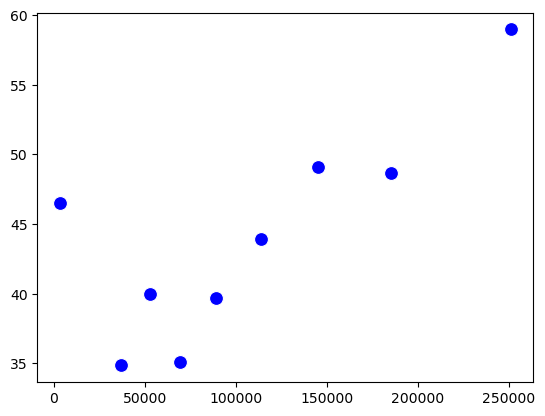

In [7]:

x = cluster_centers[:, 2]
y = cluster_centers[:, 3]
sns.scatterplot(x=x, y=y, s=100, color='blue', marker='o')

<Axes: >

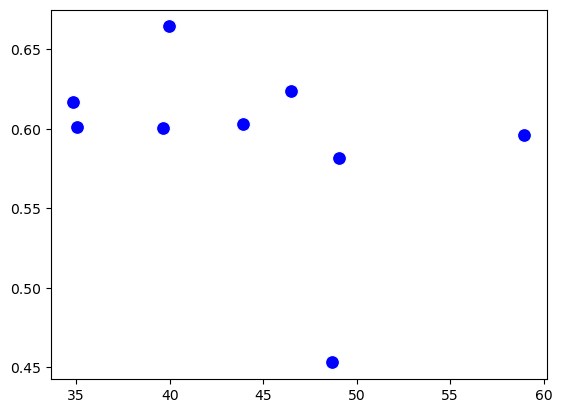

In [8]:

x = cluster_centers[:, 3]
y = cluster_centers[:, 0]
sns.scatterplot(x=x, y=y, s=100, color='blue', marker='o')

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Win

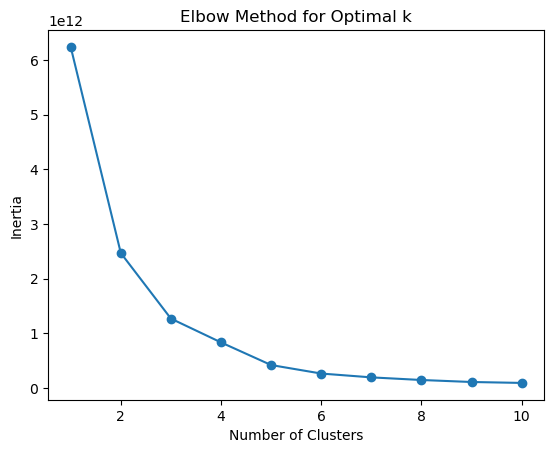

In [25]:
tests=[]
X = train_df[["ad_med_num", "ad_rep_num", "income", "age"]].values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    tests.append(kmeans.inertia_)
plt.plot(range(1, 11), tests, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


#### Don't forget to describe the centers of the clusters you found.

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Win

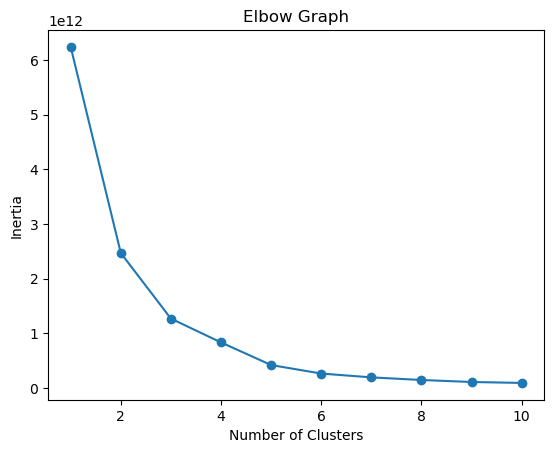

In [13]:
# Test model here.
#optimal k is 5

tests=[]
X = train_df[["ad_med_num", "ad_rep_num", "income", "age"]].values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    tests.append(kmeans.inertia_)
plt.plot(range(1, 11), tests, marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [52]:
#optimal k is 5
model = KMeans(n_clusters=5)
model.fit(train_df)
cluster_centers = model.cluster_centers_
print(cluster_centers)


#clusters follow pattern of "ad_med_num", "ad_rep_num", "income", "age"
X

[[6.39931741e-01 6.14334471e-01 4.48832927e+04 3.67363481e+01]
 [5.85284281e-01 5.95317726e-01 1.39187886e+05 4.72508361e+01]
 [4.93670886e-01 5.56962025e-01 2.33784253e+05 5.58734177e+01]
 [6.23824451e-01 5.20376176e-01 3.48507837e+03 4.64858934e+01]
 [5.91029024e-01 6.20052770e-01 8.31586847e+04 3.80237467e+01]]


C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


array([[1, 0, 55302, 26.0],
       [0, 0, 83587, 36.0],
       [0, 1, 71967, 42.0],
       ...,
       [0, 0, 95616, 31.0],
       [1, 1, 93631, 61.0],
       [1, 0, 16075, 23.0]], dtype=object)

In [50]:
from sklearn.metrics import silhouette_score

labels = model.labels_

sihouette = silhouette_score(X, labels)

print(f"Silhouette Score for k=5: {sihouette}")

Silhouette Score for k=5: 0.6103188260605298


#### Interpret your elbow plot and/or silhouette score here.

Analyzing my elbow plot helps me identify that the optimal amount of clusters is 5. This is when the changes in inertia, sum of squared distances between each data point and the centroid, is minimal. 5 is the elbow point. Furthermore, the silhouette score of .61031 is quite good. As the silhouette score approaches 1, then the model has well defined, separate clusters. A score of .61031 thus suggests that my model defines the clusters quite well. There may be some overlap with some datapoints, but overall the clustering is moderately successful. There are likely patterns which can be used to market to different demographics. I have attempted to use different amounts of clusters, but they all had less high silhouette scores.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

The cluster I am targetting has this array: [4.93670886e-01 5.56962025e-01 2.33784253e+05 5.58734177e+01]. This implies static content (picture, newspaper ad, etc.). This cluster tends to react well to the ad considering the .5569 in the ad response. While this cluster does not have the highest ad response like this cluster [5.91029024e-01 6.20052770e-01 8.31586847e+04 3.80237467e+01], the lack of personal resources and skills in regards to creation of dynamic content pushes me to use the only successful static cluster. It will focus on high income, middle aged people. 

In [60]:
statics=sdf

statics = statics[statics['ad_med_num'] != 1]
statics = statics[statics['ad_rep_num'] != 0]

print(statics['ad_type'].unique())
statics.head()

['BOGO - Baja Blast' 'BOGO - Garlic Steak Nacho Fries' 'DISCOUNT-50%'
 'DISCOUNT-20%'
 'REWARD - Free Garlic Steak Nacho Fries with purchase of $20 or more'
 'DISCOUNT-10%' 'DISCOUNT-5%']


,customer_id,state,sex,age,occupation,family_size,income,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased,ad_rep_num,ad_med_num
11,3989,AL,M,46.0,Retail,1,47946,BOGO - Baja Blast,Static Facebook ad,True,"['spicy potato soft taco', 'beefy 5 layer burr...","['baja blast', 'baja blast']",1,0
14,1838,AL,M,33.0,Retail,4,36491,BOGO - Garlic Steak Nacho Fries,Instagram photo ad,True,"['steak garlic nacho fries', 'steak garlic nac...","['iced tea', 'mountain dew', 'baja blast', 'ga...",1,0
69,6665,NC,F,42.0,IT,2,159601,BOGO - Baja Blast,Instagram photo ad,True,"['crunchwrap supreme', 'soft taco', 'nachos be...","['baja blast', 'baja blast', 'gatorade']",1,0
79,4520,IA,M,40.0,IT,4,154690,BOGO - Baja Blast,Instagram photo ad,True,"['cheesy gordita crunch', 'crunchwrap supreme'...","['baja blast', 'baja blast', 'starry', 'gatora...",1,0
95,1148,WV,F,31.0,Healthcare,5,86552,DISCOUNT-50%,Instagram photo ad,True,"['beefy 5 layer burrito', 'cheesy gordita crun...","['starry', 'starry', 'baja blast', 'diet pepsi...",1,0


After seeing which static ads tend to be successful, I will create a Buy-One-Get-One (BOGO) free ad.

Overall: I will use a static BOGO ad targetting wealthy, middle aged people.

https://github.com/Charred-Baguette/ML-AT-CCIC/blob/main/Unit%201/Kmeans/Design%201.png